In [1]:
from bayes_opt import BayesianOptimization
from scipy.optimize import minimize
import numpy as np
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from pyswarms.utils.plotters.formatters import Mesher

In [2]:
def black_box_function(x, y):
    """Function with unknown internals we wish to maximize.

    This is just serving as an example, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its output values, as unknown.
    """
    return -x ** 2 - (y - 1) ** 2 + 1

In [3]:
pbounds = {'x': (2, 4), 'y': (-3, 3)}

In [4]:
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1,
)

In [5]:
optimizer.maximize(
    init_points=2,
    n_iter=3,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -7.135    |  2.834    |  1.322    |
|  2        | -7.78     |  2.0      | -1.186    |
|  3        | -7.11     |  2.218    | -0.7867   |
|  4        | -12.4     |  3.66     |  0.9608   |
|  5        | -6.999    |  2.23     | -0.7392   |


In [6]:
print(optimizer.max)

{'target': -6.999472814518675, 'params': {'x': 2.2303920156083024, 'y': -0.7392021938893159}}


In [7]:
optimizer.set_bounds(new_bounds={"x": (-2, 3)})

optimizer.maximize(
    init_points=0,
    n_iter=5,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  6        | -2.942    |  1.98     |  0.8567   |
|  7        | -0.4597   |  1.096    |  1.508    |
|  8        |  0.5304   | -0.6807   |  1.079    |
|  9        | -5.33     | -1.526    |  3.0      |
|  10       | -5.419    | -2.0      | -0.5552   |


In [8]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7, 0.8])

initial_simplex = np.array([
    [1.1, 1.7, 2.8],
    [0.1, 1.17, 1.8],
    [1.01, 2.7, 4.8],
    [4.01, 4.7, 3.8]
])

res = minimize(rosen, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True, 'return_all':True, 'initial_simplex':initial_simplex})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 117
         Function evaluations: 217


In [9]:
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

# Perform optimization
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

2021-10-05 11:51:07,706 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████|1000/1000, best_cost=5.08e-43
2021-10-05 11:51:09,519 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.082373759160331e-43, best pos: [4.40833567e-22 5.60270597e-22]


In [10]:
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9, 'k': 2, 'p': 2}

# Call instance of PSO
optimizer = ps.single.LocalBestPSO(n_particles=10, dimensions=2, options=options)

# Perform optimization
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

2021-10-05 11:51:10,260 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}
pyswarms.single.local_best: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████|1000/1000, best_cost=4.39e-43
2021-10-05 11:51:13,164 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 4.394129988539815e-43, best pos: [-2.03876559e-22  6.30751415e-22]


In [11]:
max_bound = 5.12 * np.ones(2)
min_bound = - max_bound
bounds = (min_bound, max_bound)
print(bounds)

# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO with bounds argument
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(fx.rastrigin, iters=1000)

2021-10-05 11:51:14,005 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


(array([-5.12, -5.12]), array([5.12, 5.12]))


pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████|1000/1000, best_cost=0
2021-10-05 11:51:16,389 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [ 2.95811477e-09 -1.52815732e-09]


In [19]:
def rosenbrock_with_args(x, a, b, c=0):
    print(x.shape)
    sys.exit()
    f = (a - x[:, 0]) ** 2 + b * (x[:, 1] - x[:, 0] ** 2) ** 2 + c
    return f

# instatiate the optimizer
x_max = 10 * np.ones(2)
x_min = -1 * x_max
bounds = (x_min, x_max)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds=bounds)

# now run the optimization, pass a=1 and b=100 as a tuple assigned to args

cost, pos = optimizer.optimize(rosenbrock_with_args, 1000, a=1, b=100, c=0)

2021-10-05 14:17:57,457 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|                                                                                                                                                      |0/1000


(10, 2)


NameError: name 'sys' is not defined

In [14]:
print(pos)

[1. 1.]


<AxesSubplot:title={'center':'Cost History'}, xlabel='Iterations', ylabel='Cost'>

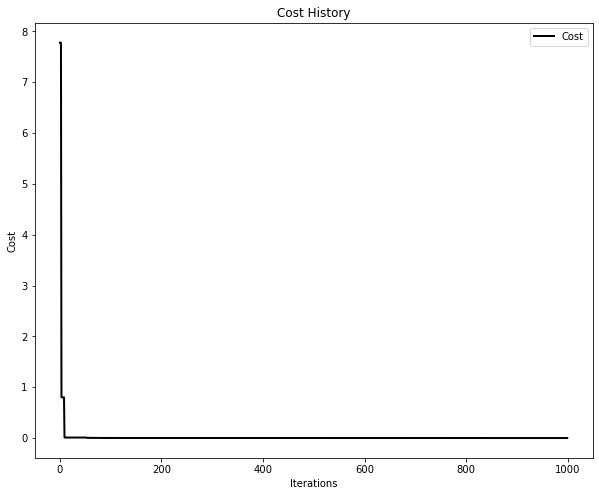

In [15]:
plot_cost_history(cost_history=optimizer.cost_history)

In [16]:
aa = optimizer.cost_history

In [18]:
print(len(aa))

1000
